<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/11_OlivettiFaces_ManifoldLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the relationship between high-dimensional data points using manifold learning

* Manifold learning is often used is in understanding the relationship between high-dimensional data points.
* A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.
    
 https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import offsetbox

### Load, explore Data
* 400 images with 4096 pixels.
* The images can be thought of as data points in a 4096-dimensional space.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [3]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

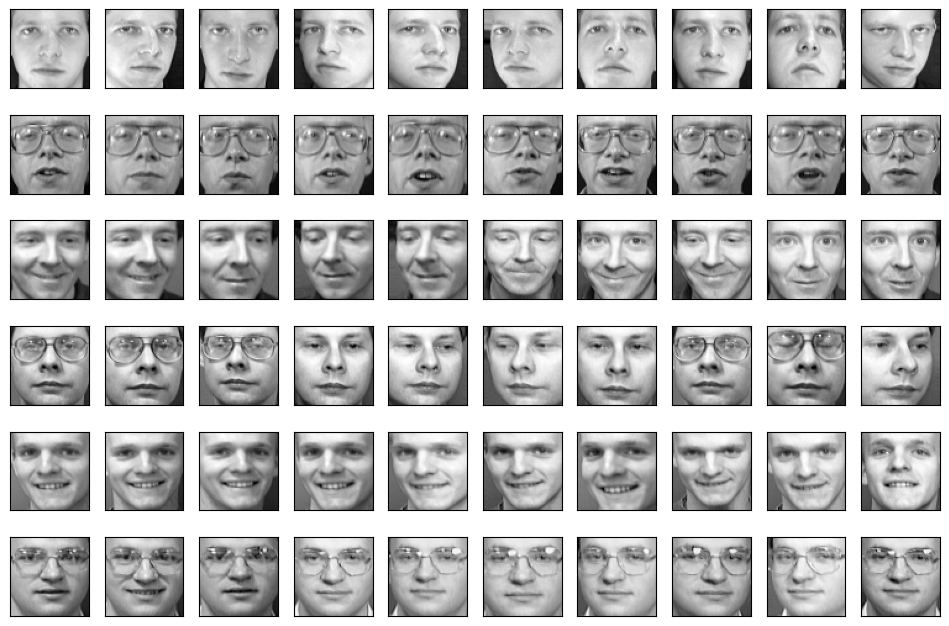

In [4]:
fig, ax = plt.subplots(6, 10, figsize=(12, 8), subplot_kw=dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'gray')

In [5]:
X = faces.data

y = faces.target

In [6]:
X.shape

(400, 4096)

In [ ]:
pd.DataFrame(X).sample(10)

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
147,0.537190,0.520661,0.537190,0.595041,0.640496,0.702479,0.731405,0.673554,0.599174,0.557851,...,0.508264,0.516529,0.524793,0.495868,0.491736,0.504132,0.483471,0.495868,0.500000,0.491736
190,0.479339,0.549587,0.628099,0.690083,0.677686,0.652893,0.640496,0.636364,0.648760,0.648760,...,0.301653,0.214876,0.219008,0.219008,0.223140,0.223140,0.227273,0.223140,0.219008,0.227273
42,0.661157,0.661157,0.665289,0.669421,0.702479,0.727273,0.743802,0.756198,0.768595,0.760331,...,0.214876,0.206612,0.206612,0.206612,0.206612,0.206612,0.206612,0.214876,0.210744,0.223140
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.136364,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893
276,0.706612,0.702479,0.735537,0.780992,0.789256,0.772727,0.789256,0.789256,0.789256,0.776860,...,0.202479,0.140496,0.152893,0.161157,0.148760,0.181818,0.210744,0.152893,0.177686,0.107438
132,0.669421,0.636364,0.648760,0.685950,0.710744,0.760331,0.768595,0.805785,0.793388,0.809917,...,0.227273,0.223140,0.219008,0.115702,0.090909,0.090909,0.095041,0.086777,0.082645,0.074380
178,0.421488,0.450413,0.512397,0.533058,0.504132,0.524793,0.524793,0.549587,0.599174,0.615702,...,0.214876,0.256198,0.247934,0.247934,0.256198,0.264463,0.293388,0.330579,0.322314,0.338843
320,0.123967,0.099174,0.123967,0.107438,0.107438,0.128099,0.128099,0.132231,0.148760,0.148760,...,0.330579,0.082645,0.165289,0.404959,0.632231,0.603306,0.177686,0.479339,0.619835,0.615702
149,0.566116,0.595041,0.603306,0.619835,0.636364,0.640496,0.661157,0.681818,0.685950,0.694215,...,0.404959,0.413223,0.404959,0.392562,0.384298,0.380165,0.376033,0.380165,0.351240,0.351240
148,0.520661,0.549587,0.586777,0.590909,0.607438,0.611570,0.648760,0.661157,0.665289,0.677686,...,0.500000,0.483471,0.438017,0.442149,0.425620,0.413223,0.400826,0.367769,0.371901,0.305785


In [7]:
y.shape

(400,)

In [8]:
pd.DataFrame(y).sample(10)

,0
113,11
270,27
222,22
194,19
256,25
193,19
23,2
333,33
203,20
152,15


### Find principle components
* RandomizedPCA: Principal component analysis (PCA) using randomized SVD

In [9]:
from sklearn.decomposition import PCA

model = PCA(100).fit(X)

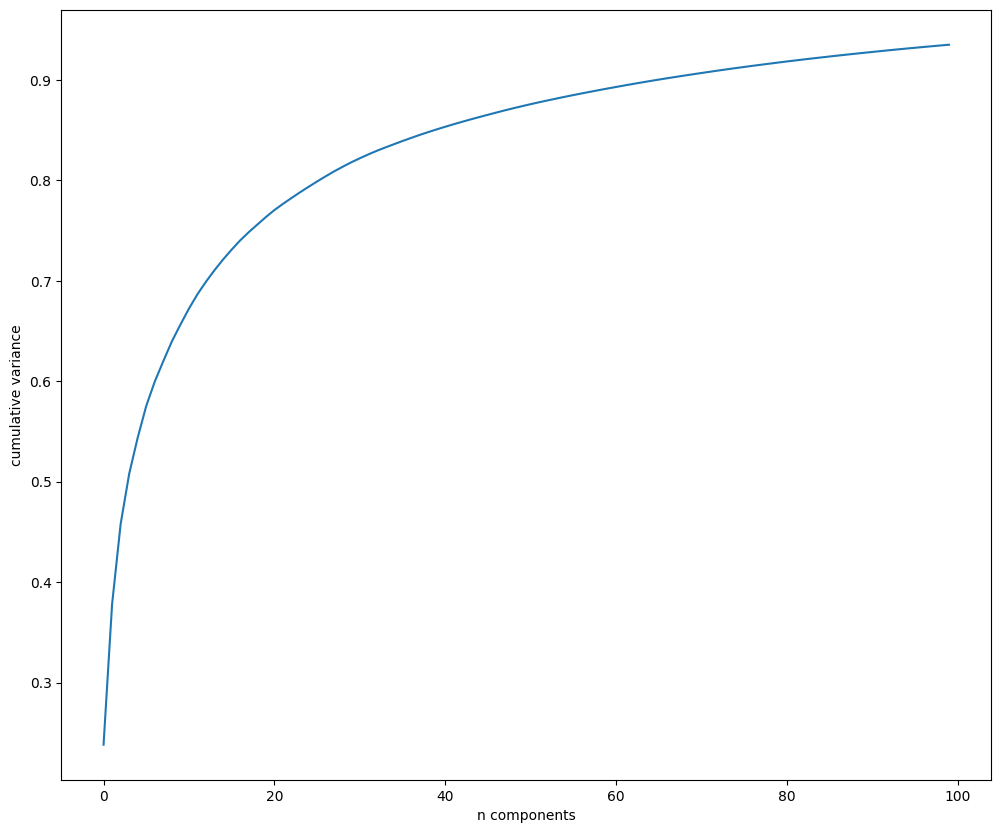

In [10]:
plt.figure(figsize = (12, 10))
plt.plot(np.cumsum(model.explained_variance_ratio_))

plt.xlabel('n components')
plt.ylabel('cumulative variance');

In [14]:
def plot_components(data, X_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):

    ax = ax or plt.gca()
    ax.plot(X_new[:, 0], X_new[:, 1], '.k')

    if images is not None:

        min_dist = (thumb_frac * max( X_new.max(0) - X_new.min(0) )) ** 2
        shown_images = np.array( [2 * X_new.max(0)] )

        for i in range(data.shape[0]):

            dist = np.sum((X_new[i] - shown_images) ** 2, 1)

            if np.min(dist) < min_dist:
                continue                            # don't show points that are too close

            shown_images = np.vstack([shown_images, X_new[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), X_new[i])

            ax.add_artist(imagebox)

## Apply Manifold Learning

In [15]:
def apply_manifold_learning(X, method, show_scatter_plot = False):

    X_new = method.fit_transform(X)

    print ("New shape of X : ", X_new.shape)
    print()
    print ("Sample X : \n")
    print (pd.DataFrame(X_new).sample(10))
    print()

    if show_scatter_plot is not False:

        fig, ax = plt.subplots(figsize = (12, 10))
        ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')
        plt.xlabel('X[0] after transformation')
        plt.ylabel('X[1] after transformation');

    fig, ax = plt.subplots(figsize = (12, 8))
    plot_components(X[:20,:], X_new[:20,:], images = faces.images[:, ::2, ::2])
    plt.xlabel('Component 1')
    plt.ylabel('Component 2');

    return method

### Apply MDS

* Nearly 100 components are required to preserve 90% of the variance
* The data is intrinsically very high dimensional
* It can't be described linearly with just a few components.

* When this is the case, nonlinear manifold embeddings can be used to get a two-dimensional projection of all the input images
* Apply mds to get two components
* n_init : Number of times the SMACOF algorithm will be run with different initializations. The final results will be the best output of the runs, determined by the run with the smallest final stress.
* max_iter : Maximum number of iterations of the SMACOF algorithm for a single run.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


New shape of X :  (400, 2)

Sample X : 

            0          1
139 -4.267279  -0.144872
36   1.641394  -5.203950
218 -2.976203  11.855525
216 -3.185662  12.532559
120  1.020717   1.705404
237 -4.524783  -4.490761
116 -6.457971   3.950785
321  5.221336  11.346725
194  7.240850  -4.115971
137 -4.893686  -0.442893



<ipython-input-15-874c5147eb5f>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[:, 0], X_new[:, 1], cmap = 'Spectral')


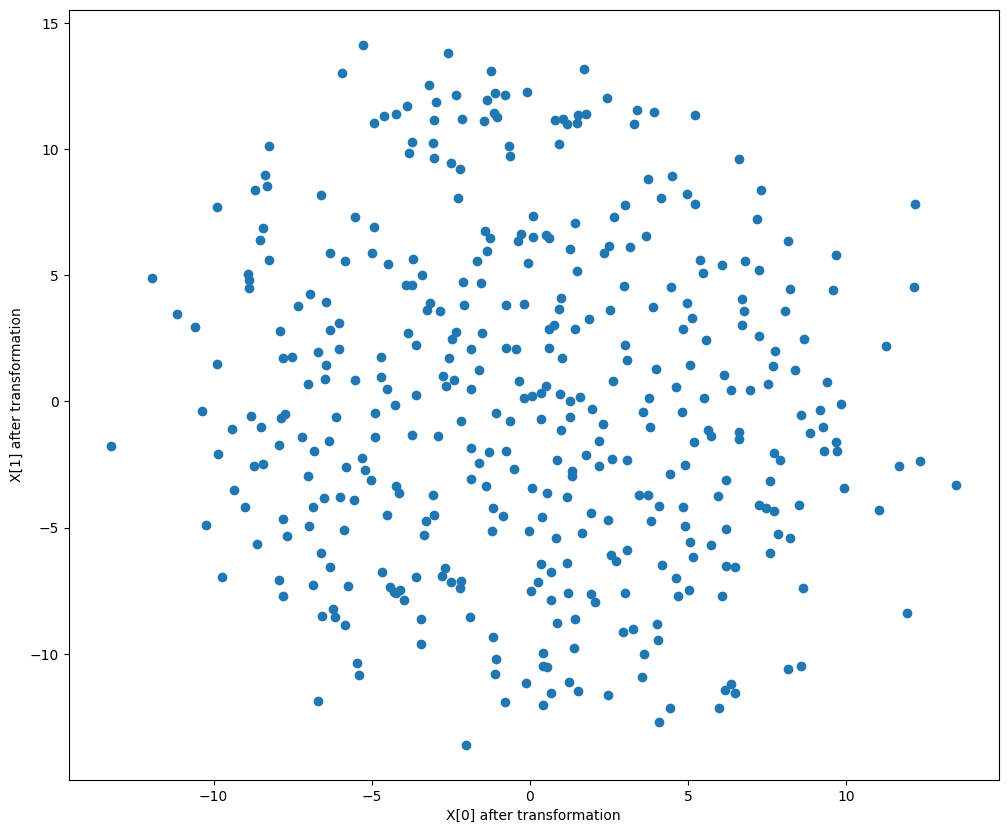

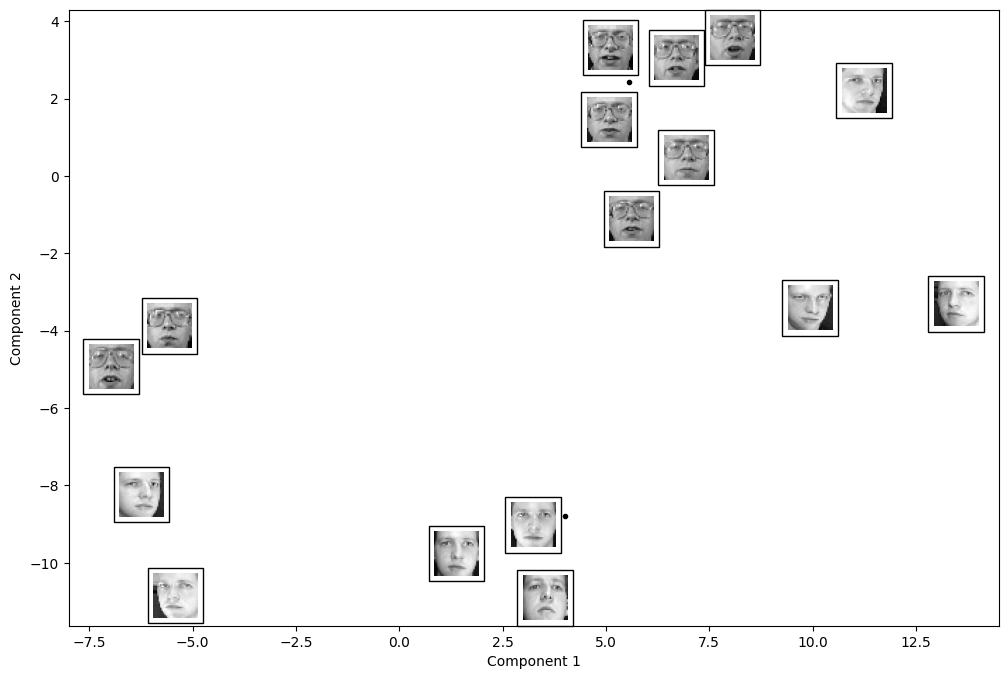

In [16]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(X,
        MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100), \
        show_scatter_plot = True )

### Apply Isomap
* Represent 4906-dim data in 2d

New shape of X :  (400, 2)

Sample X : 

             0         1
266  -7.384565 -8.412140
100 -18.895060 -5.535820
86   -0.052943  7.279135
30   -2.853150  0.171456
332  22.458530 -7.026463
330  26.075026 -4.935183
174  -2.746039  5.655581
250   1.581818 -7.139896
137  -2.304565 -2.681047
159  -7.902984  7.082366



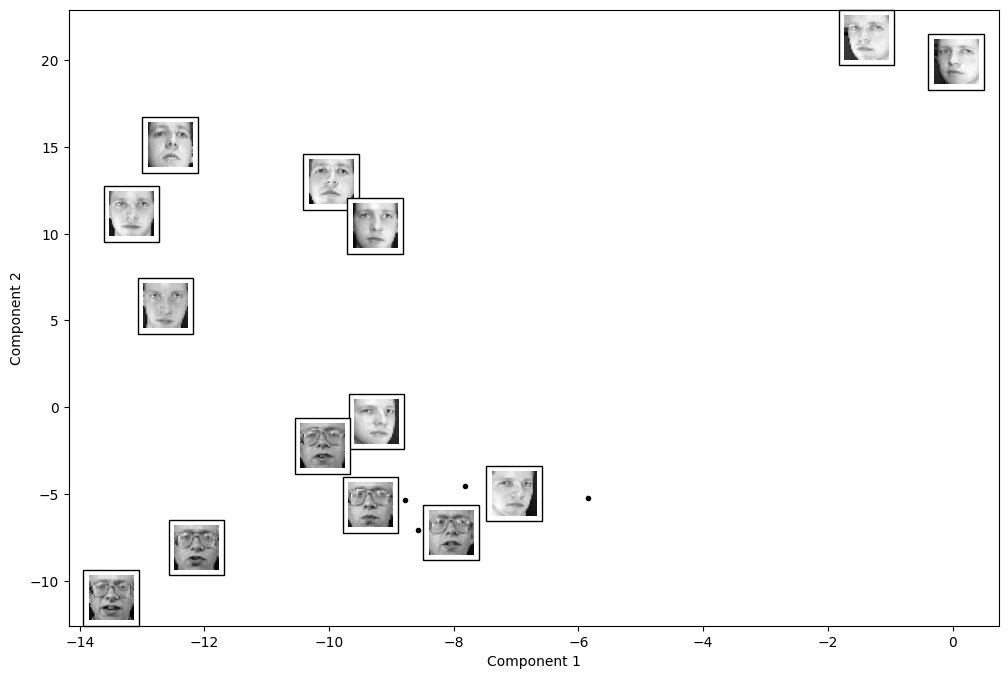

In [17]:
from sklearn.manifold import Isomap

isomap = apply_manifold_learning(X, Isomap(n_neighbors = 10, n_components = 2))

### Apply LLE

New shape of X :  (400, 2)

Sample X : 

            0         1
207 -0.016896 -0.019320
162  0.022670 -0.022778
121  0.022740 -0.013626
227  0.028051 -0.025683
322 -0.071017 -0.011913
125  0.022347 -0.021607
316  0.027368  0.031699
154  0.027357  0.049931
238 -0.010772 -0.019049
156  0.020907 -0.015107



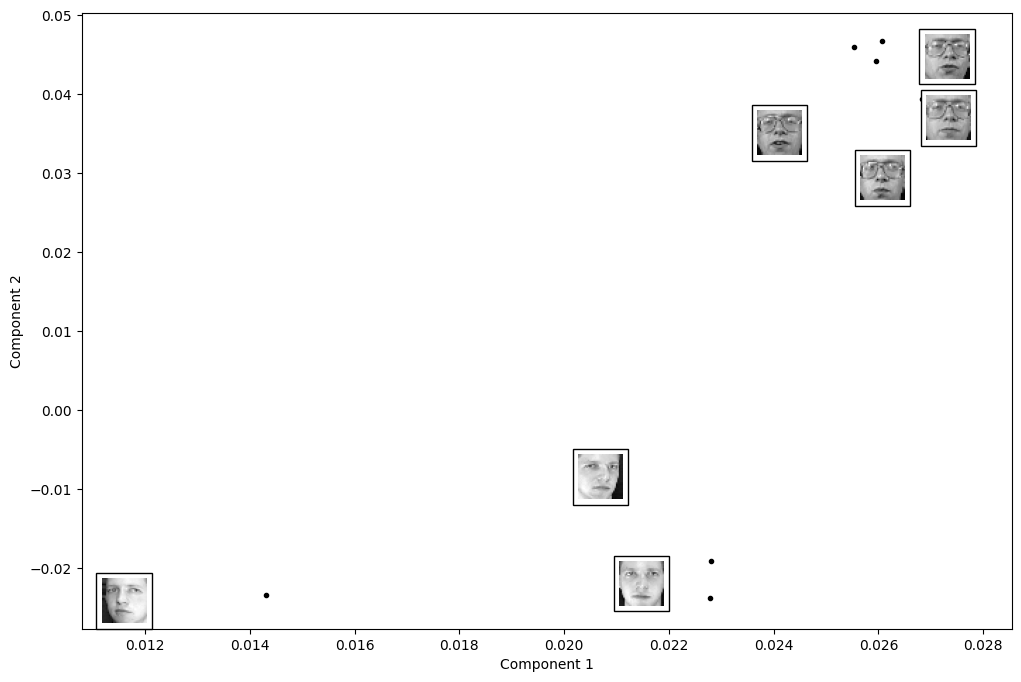

In [18]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'standard'))

### Apply HLLE

New shape of X :  (400, 2)

Sample X : 

            0         1
244  0.003560  0.013290
26   0.005706  0.014703
308  0.007324  0.006329
40   0.002923  0.012692
27   0.008513  0.012275
194  0.004920  0.026499
345 -0.000529  0.023468
105  0.004947  0.021631
284  0.003171 -0.015686
20   0.005515  0.013457



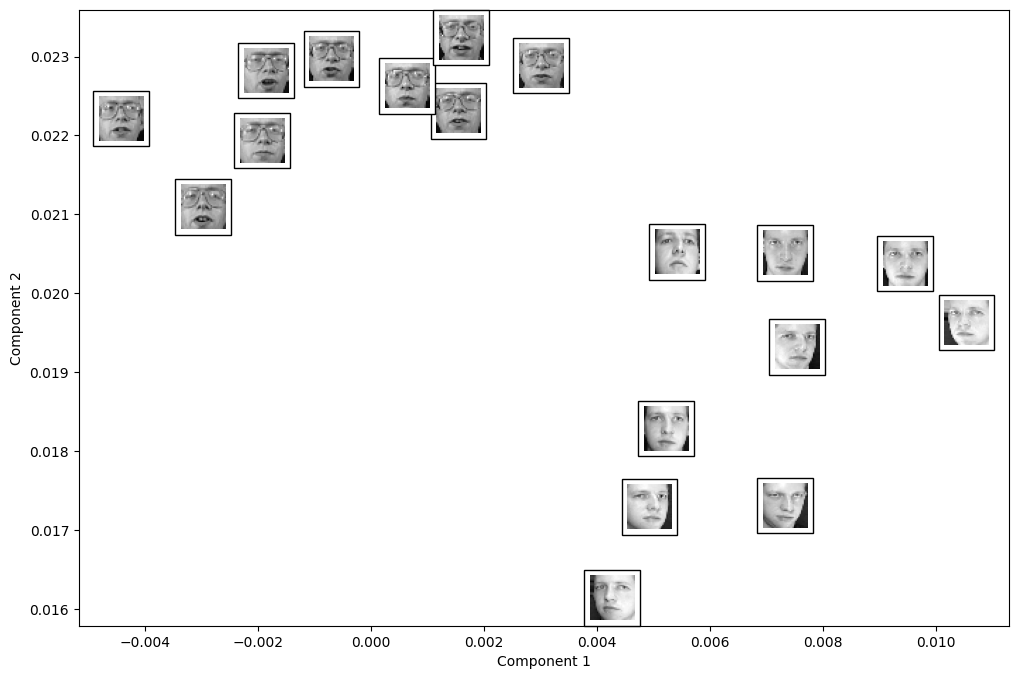

In [19]:
hlle = apply_manifold_learning(X, \
    LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian'))

### Apply Spectral Embedding

New shape of X :  (400, 2)

Sample X : 

            0         1
73  -0.003065 -0.011677
333  0.022096  0.000558
312 -0.005220 -0.013383
228 -0.005315  0.015816
227 -0.005023 -0.004527
258 -0.001264 -0.006180
56  -0.006622  0.013661
306  0.009941 -0.002134
142 -0.004542 -0.005123
115 -0.004916  0.013077



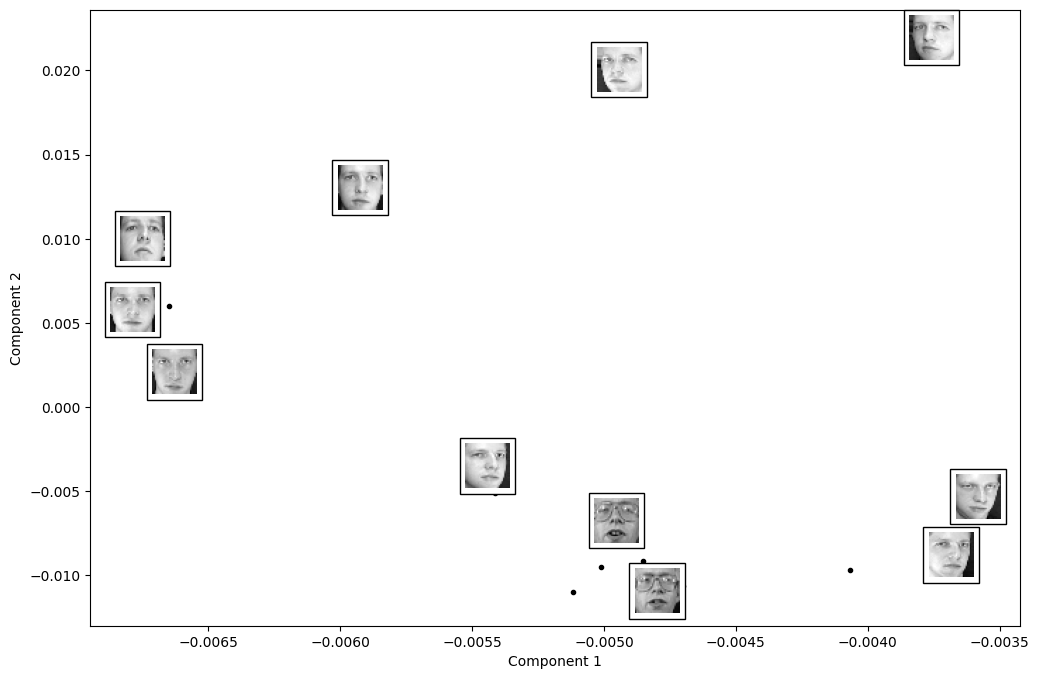

In [20]:
from sklearn.manifold import SpectralEmbedding

spectral_em = apply_manifold_learning(X, \
    SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = "arpack"))

### Apply t-SNE

New shape of X :  (400, 2)

Sample X : 

             0          1
132   7.237221 -11.604453
127   3.478770  15.800637
195  14.873328 -12.829959
313 -20.443682 -14.272574
151 -15.522788   3.183584
385  32.795502   7.163923
373   6.950747   1.109049
384  32.699188   4.313172
316 -18.189083 -18.140675
177  -9.275943   3.441493



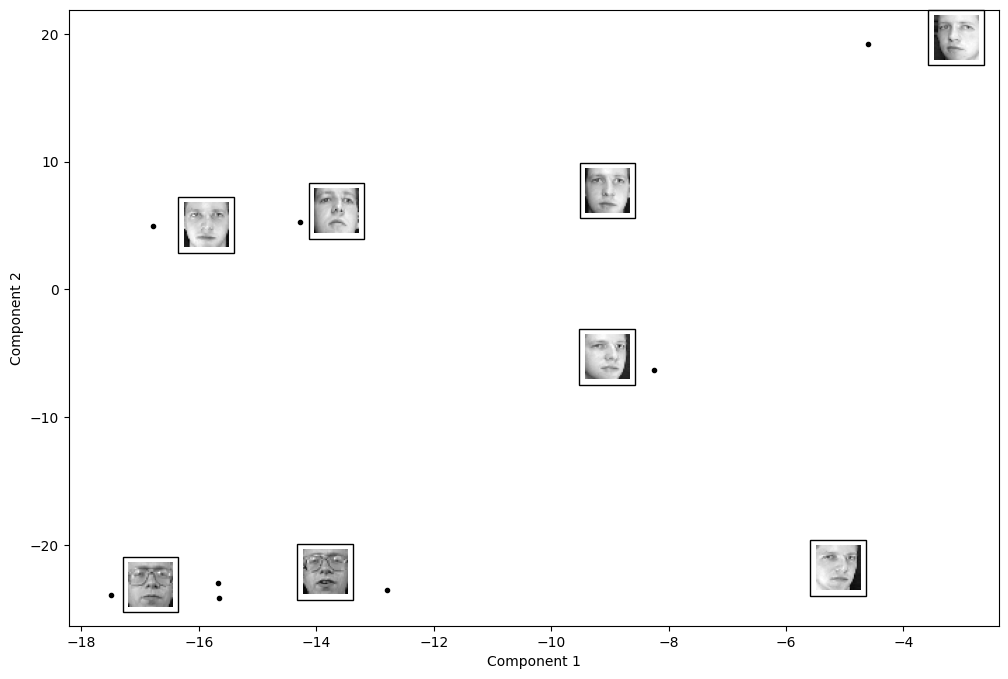

In [21]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(X, TSNE(n_components = 2, init = 'pca', random_state = 0))